 # GAME BOCIL
 ## 202000162 - Jastin S
 ## 202000141 - Jabez Joeniko

# Items Detection with Yolo v8
- 1 of the component to make NPC/Bot is vision
- YOLOv8 is based on a deep convolutional neural network (CNN) architecture that is similar to its predecessors.
- Top Model for Object Detection based on HitechBPO
- Will be used for live detection


## Dataset
- Manual Screen Shot from the game
- Proceed and labeled by thirdparty program (roboflow)
- 35 Total of dataset (25 Train, 5 Test, and 5 Validation)

![Label Distribution](photo_2023-12-16_23-44-42.jpg "Label Distribution")


### Preparing The Tools

In [1]:
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 862.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

## Download Dataset

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="AKgS9nU3Ph5ZHne7Ialq")
project = rf.workspace("growtopias-item-detection").project("detection-ytroa")
dataset = project.version(7).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to detection-7 in yolov8:: 100%|██████████| 82/82 [00:00<00:00, 2963.07it/s]


### Training Model
- Train model with pretrained model
- 20 Epoch

In [4]:
# Train the model
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 131M/131M [00:00<00:00, 324MB/s]
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/detection-7/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

### Matrix Train Set

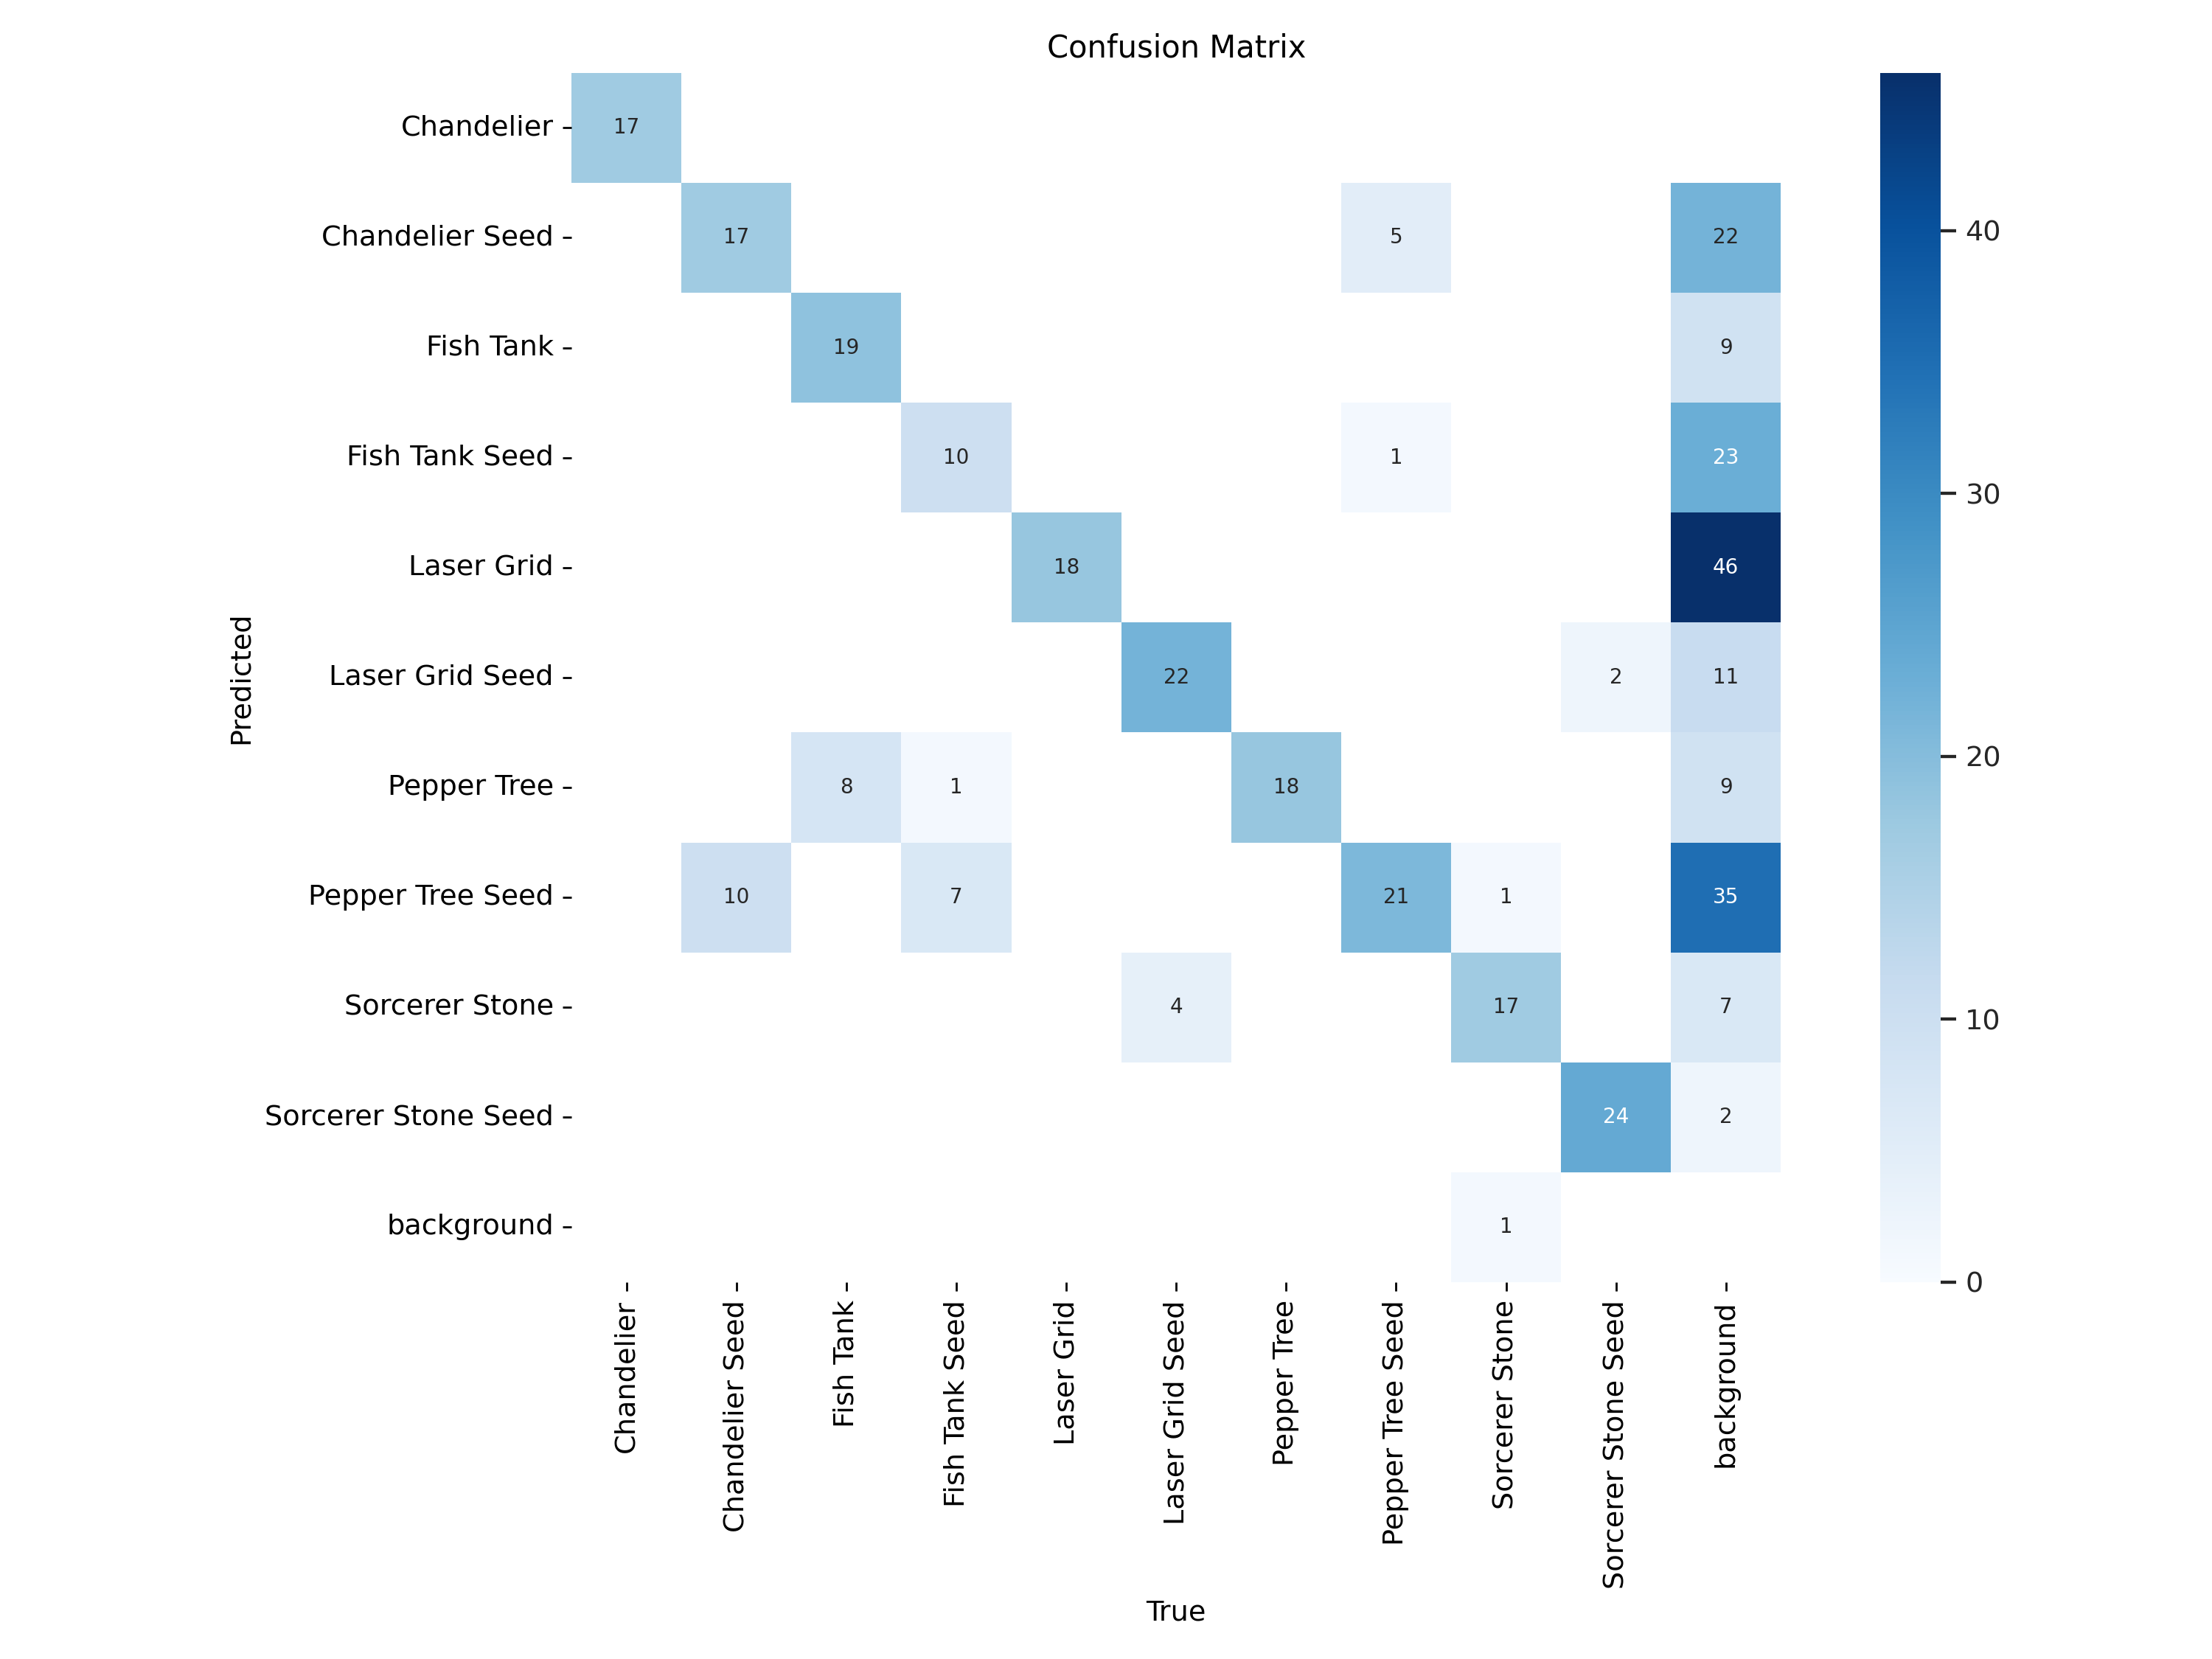

In [5]:
Image(filename='/content/runs/detect/train/confusion_matrix.png')

### Validating Model

In [6]:
!yolo mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/detection-7/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ NMS time limit 0.750s exceeded
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.66s/it]
                   all          5        223      0.898        0.2      0.199      0.148
            Chandelier          5         17          1          0          0          0
       Chandelier Seed          5         27          1          0          0          0
             Fish Tank          5         27          1          0          0          0
        Fish Tank Seed          5         18          1          0        

### Matrix Validation

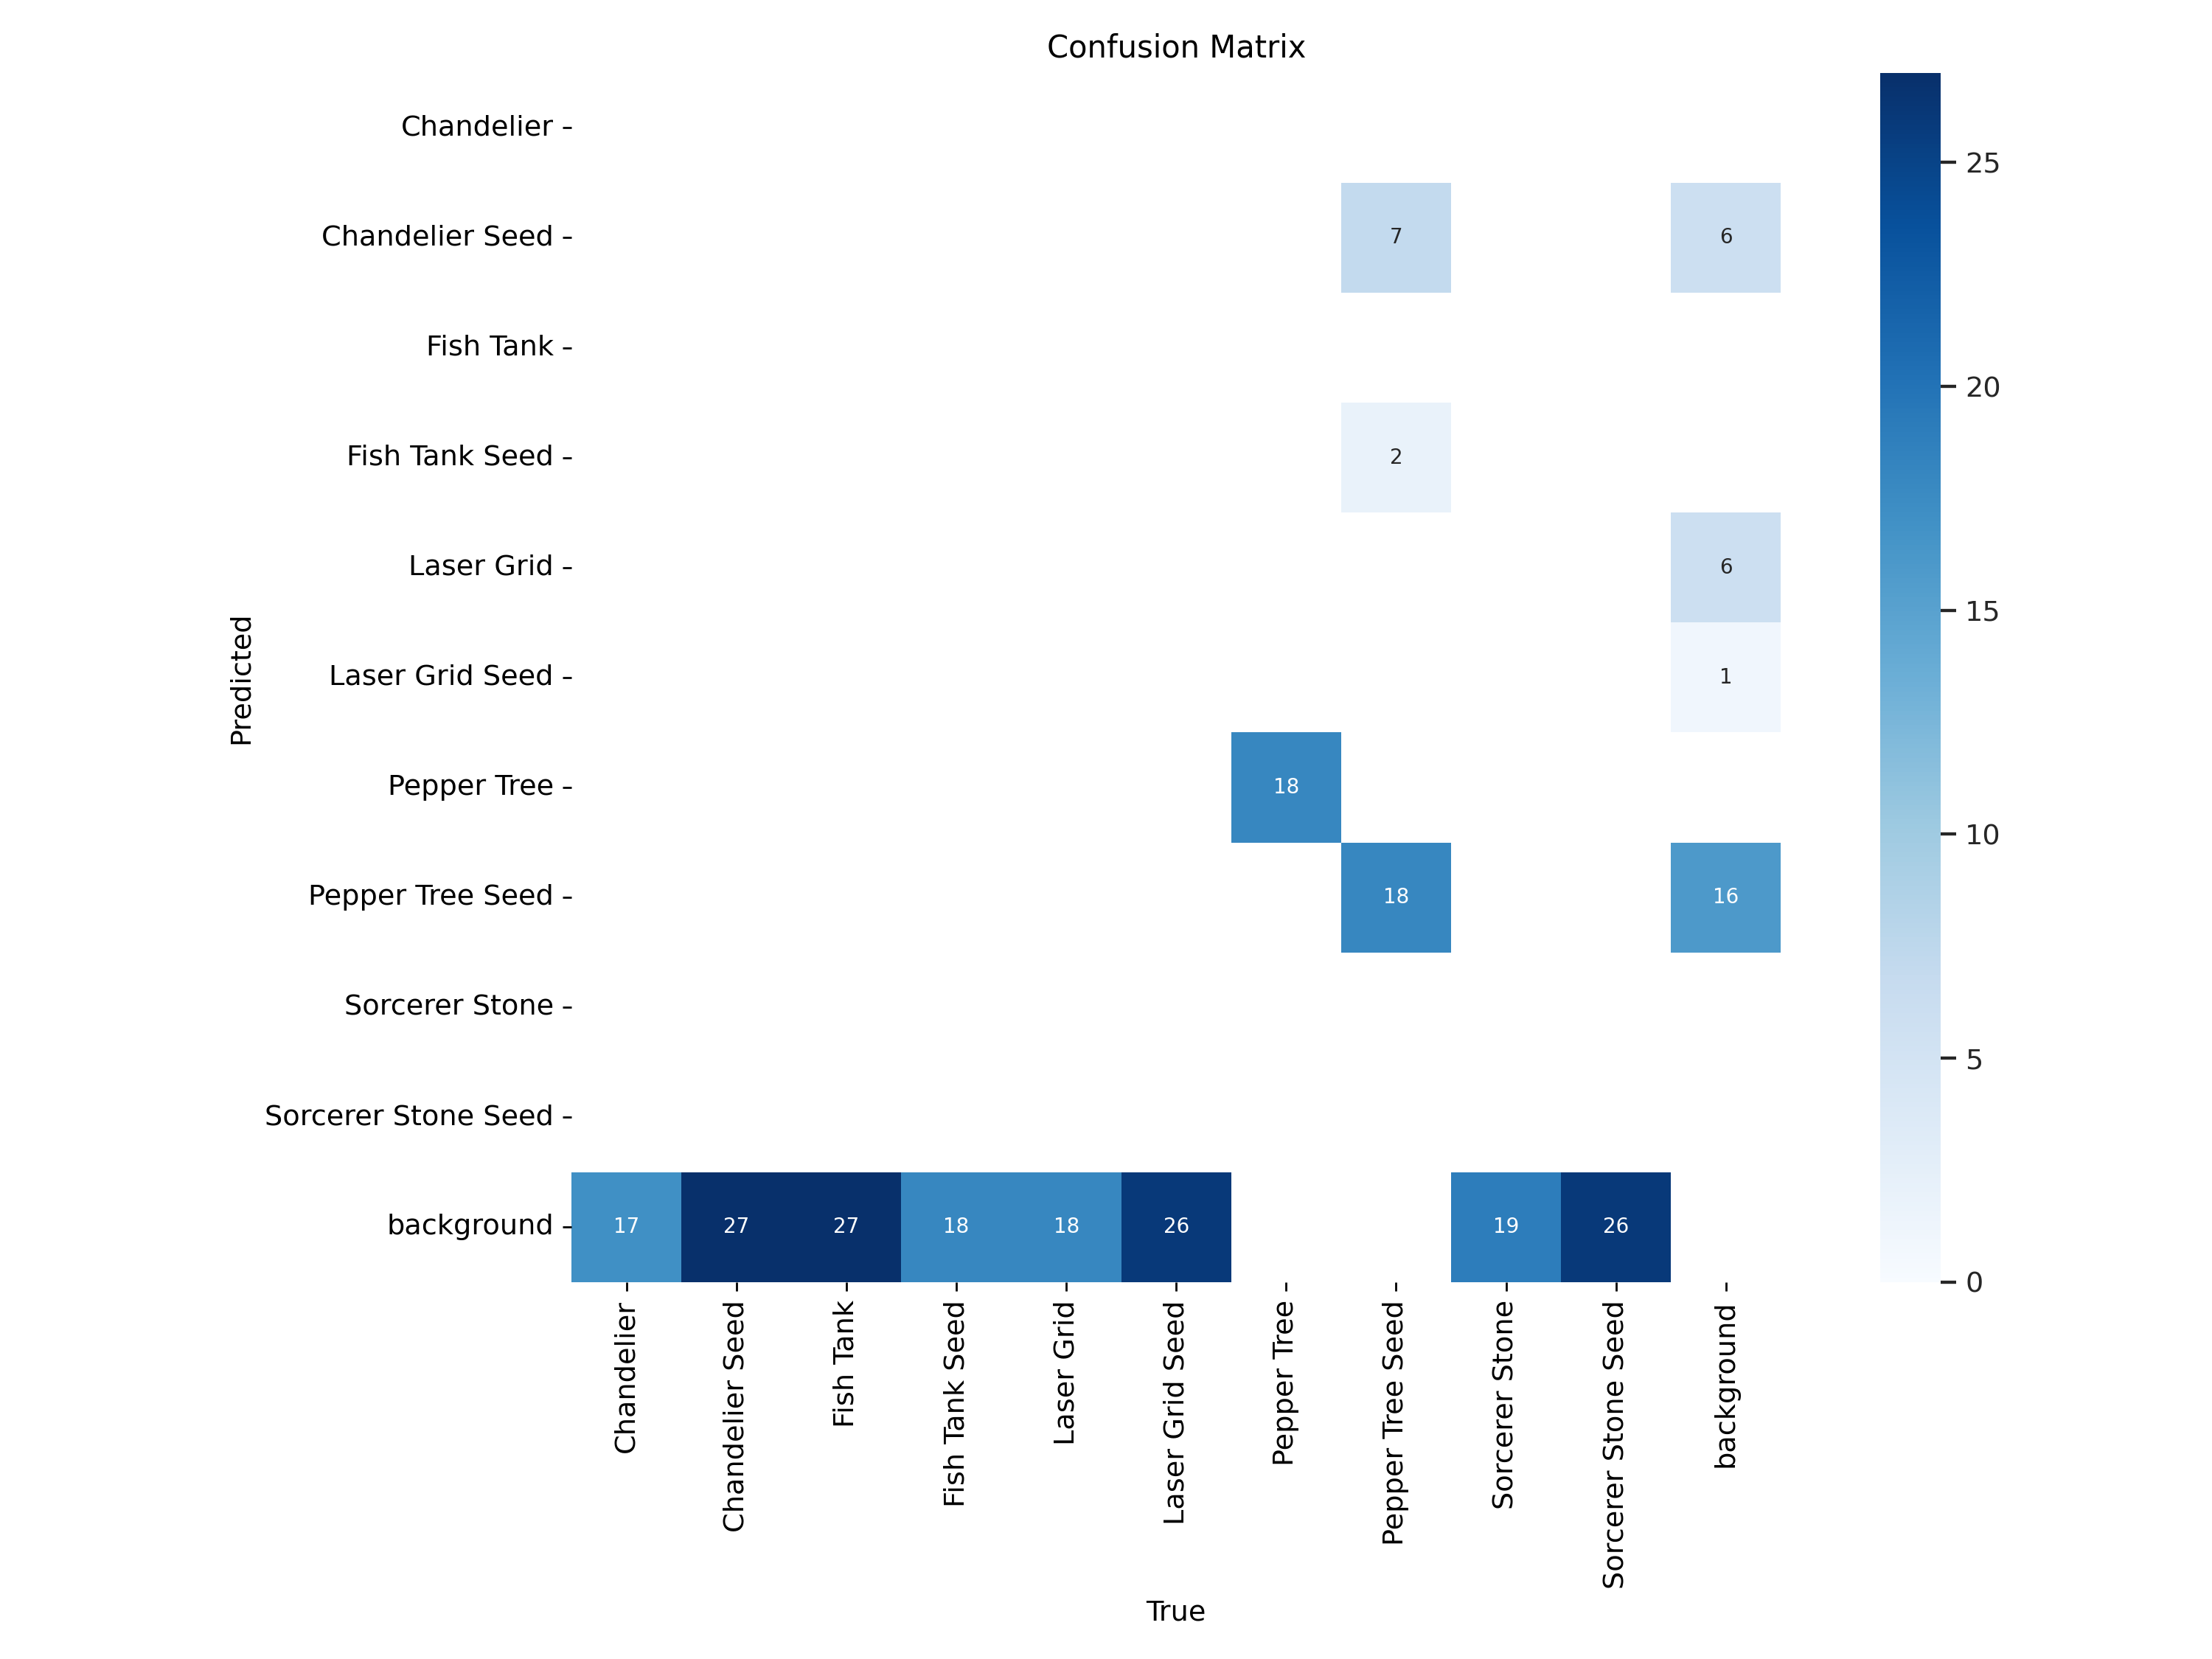

In [8]:
Image(filename='/content/runs/detect/val/confusion_matrix.png')

### Predict Model

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/detection-7/test/images

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/detection-7/test/images/photo_2023-12-16_22-24-25_jpg.rf.543264234981f1cd4050b1bc07fd7907.jpg: 384x640 10 Chandeliers, 5 Chandelier Seeds, 4 Fish Tanks, 10 Fish Tank Seeds, 8 Laser Grids, 7 Laser Grid Seeds, 14 Pepper Trees, 9 Pepper Tree Seeds, 7 Sorcerer Stones, 9 Sorcerer Stone Seeds, 112.3ms
image 2/5 /content/detection-7/test/images/photo_2023-12-16_22-24-26_jpg.rf.b327ef7c4f3c86bd7da087f806edc3b0.jpg: 384x640 7 Chandeliers, 8 Chandelier Seeds, 8 Fish Tanks, 8 Fish Tank Seeds, 11 Laser Grids, 6 Laser Grid Seeds, 13 Pepper Trees, 7 Pepper Tree Seeds, 8 Sorcerer Stones, 5 Sorcerer Stone Seeds, 40.6ms
image 3/5 /content/detection-7/test/images/photo_2023-12-16_22-24-27_jpg.rf.a227a3fb4540a80cfce2611c554f9fec.jpg: 416x640 2 Fish Tanks, 13 Laser Grids, 1 Pep

### Prediction

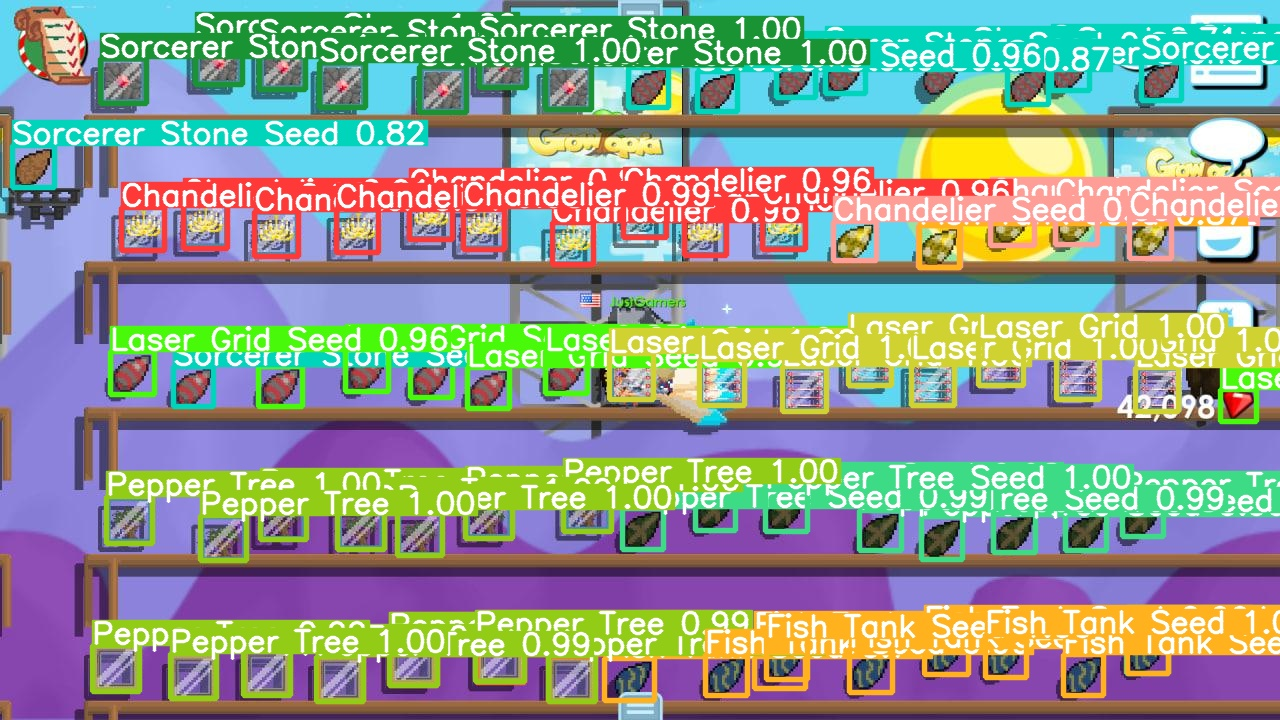

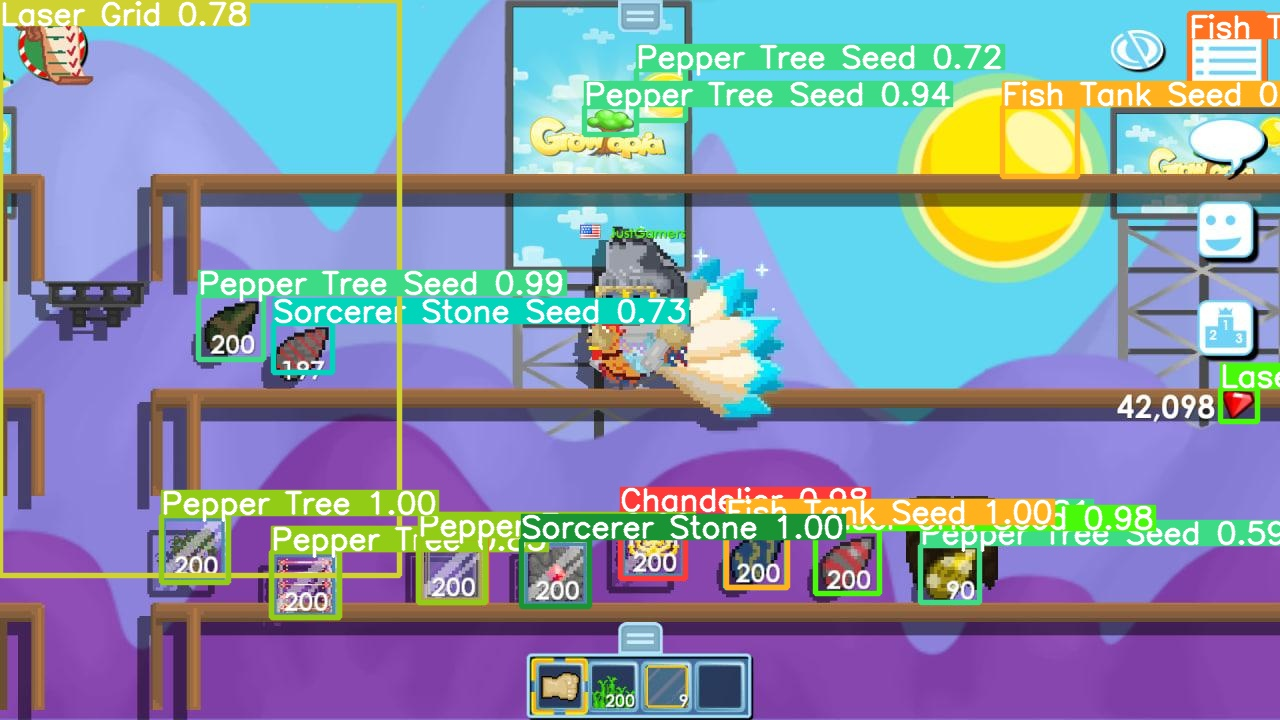

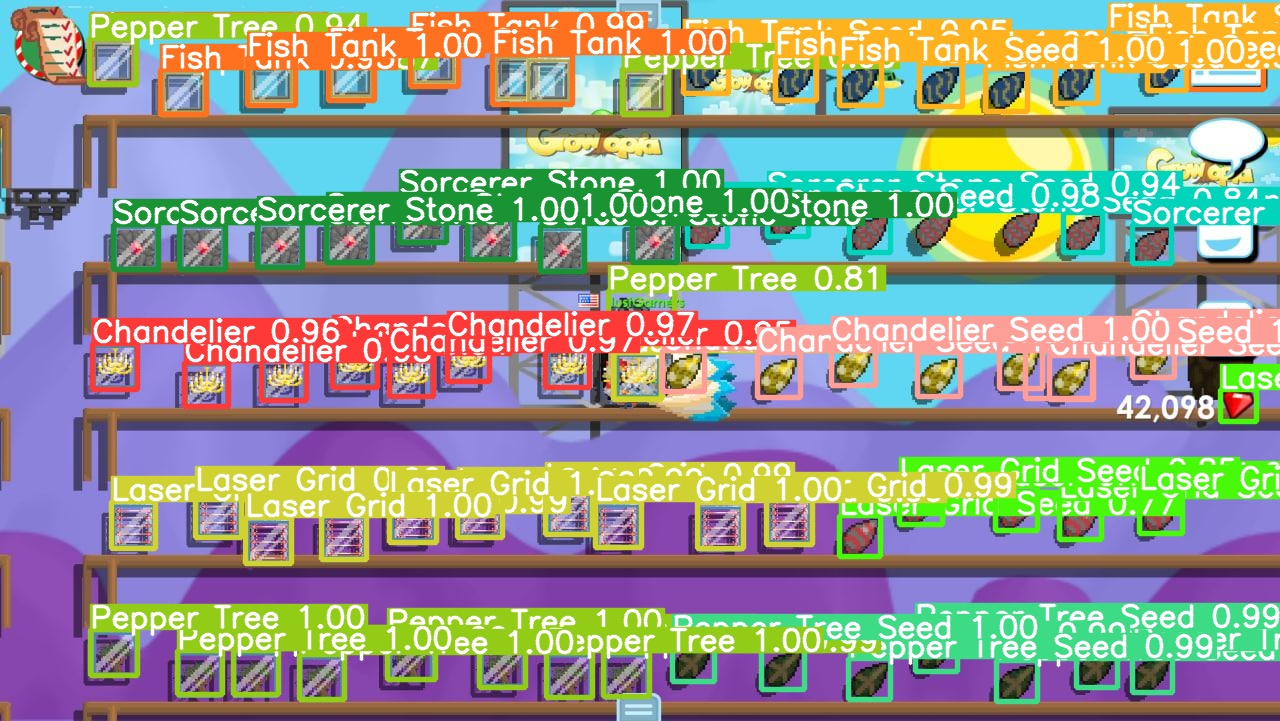

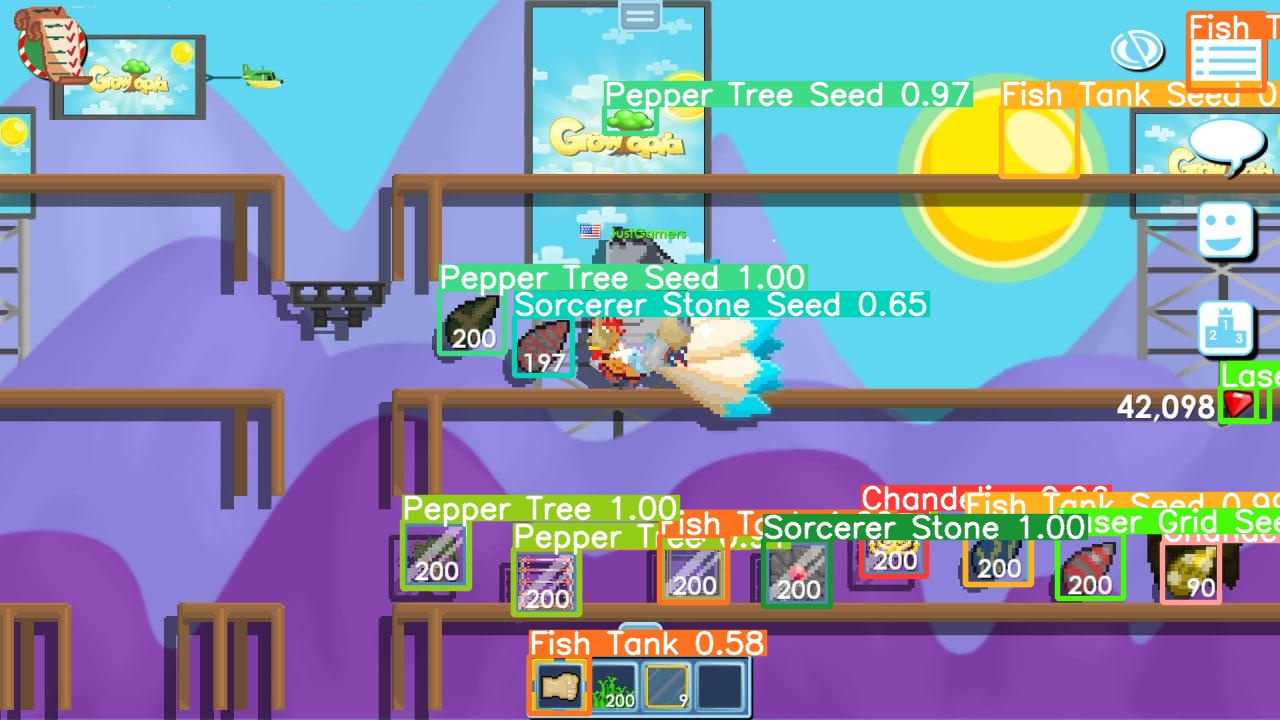

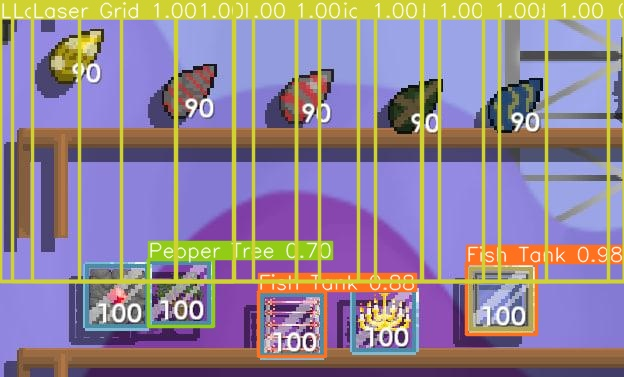

In [13]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")

### Problem
- Dataset kurang banyak
- Penggunaan thirdparties terbatas
- DETR yang masih kurang eksplorasi

Persentase:
- 202000141 = 55%
- 202000162 = 45%

“Di hadapan TUHAN yang hidup, saya menegaskan bahwa saya tidak memberikan
maupun menerima bantuan apapun—baik lisan, tulisan, maupun elektronik—di dalam
ujian ini selain daripada apa yang telah diizinkan oleh pengajar, dan tidak akan
menyebarkan baik soal maupun jawaban ujian kepada pihak lain.”
